In [157]:
import pandas as pd

In [158]:
filename= "Users_dataset.csv"
dataset = pd.read_csv(filename)

In [199]:
dataset

,username,timezone,nretweets,nlikes,geo,hour,place,count,likesCount,group
0,szymekstream,100,835.0,7983.0,NaN,14,NaN,4286,1.862576,0
1,nostromo242,100,149.0,2488.0,NaN,10,NaN,2628,0.946728,0
2,mucalukas,100,314.0,5866.0,NaN,22,NaN,2064,2.842054,0
3,mbalawelder,100,54123.0,152972.0,NaN,0,NaN,15235,10.040827,0
4,lili_pom11,100,2615.0,25070.0,NaN,19,NaN,6897,3.634914,0
...,...,...,...,...,...,...,...,...,...,...
76,mije78850505,100,1.0,77.0,NaN,9,NaN,571,0.134851,3
77,seszele_,100,10.0,432.0,NaN,10,NaN,222,1.945946,3
78,daguuniaa,100,1066.0,28356.0,NaN,15,NaN,7149,3.966429,3
79,hellosocial_pl,100,9.0,35.0,NaN,11,NaN,88,0.397727,4


In [156]:
X= dataset.iloc[:, 4:]
X.to_csv(filename,index=False)

In [160]:
import plotly.express as px
fig = px.histogram(dataset, x="group")
fig.show()

In [161]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [200]:
X = dataset.iloc[:, 1:-1]
X

,timezone,nretweets,nlikes,geo,hour,place,count,likesCount
0,100,835.0,7983.0,NaN,14,NaN,4286,1.862576
1,100,149.0,2488.0,NaN,10,NaN,2628,0.946728
2,100,314.0,5866.0,NaN,22,NaN,2064,2.842054
3,100,54123.0,152972.0,NaN,0,NaN,15235,10.040827
4,100,2615.0,25070.0,NaN,19,NaN,6897,3.634914
...,...,...,...,...,...,...,...,...
76,100,1.0,77.0,NaN,9,NaN,571,0.134851
77,100,10.0,432.0,NaN,10,NaN,222,1.945946
78,100,1066.0,28356.0,NaN,15,NaN,7149,3.966429
79,100,9.0,35.0,NaN,11,NaN,88,0.397727


In [201]:
for col in X.columns:
    print(col)

timezone
nretweets
nlikes
geo
hour
place
count
likesCount


In [202]:
for col in X.columns:
    if X[col].isna().all():
        X = X.drop([col],axis=1)
X

,timezone,nretweets,nlikes,hour,count,likesCount
0,100,835.0,7983.0,14,4286,1.862576
1,100,149.0,2488.0,10,2628,0.946728
2,100,314.0,5866.0,22,2064,2.842054
3,100,54123.0,152972.0,0,15235,10.040827
4,100,2615.0,25070.0,19,6897,3.634914
...,...,...,...,...,...,...
76,100,1.0,77.0,9,571,0.134851
77,100,10.0,432.0,10,222,1.945946
78,100,1066.0,28356.0,15,7149,3.966429
79,100,9.0,35.0,11,88,0.397727


In [203]:
y = dataset['group']
y

0     0
1     0
2     0
3     0
4     0
     ..
76    3
77    3
78    3
79    4
80    4
Name: group, Length: 81, dtype: int64

In [204]:
clf = tree.DecisionTreeClassifier()

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=666)

In [206]:
from sklearn.metrics import classification_report

In [207]:
clf = clf.fit(X_train, y_train)

In [208]:
y_pred = clf.predict(X_train)
print('train data',len(X_train))
print(classification_report(y_train, y_pred))

train data 54
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         1

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [209]:
y_pred = clf.predict(X_test)
print('test data',len(X_test))
print(classification_report(y_test, y_pred))

test data 27
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.79      0.75      0.77        20
           2       0.00      0.00      0.00         0
           3       0.25      0.33      0.29         3
           4       0.00      0.00      0.00         1

    accuracy                           0.59        27
   macro avg       0.21      0.22      0.21        27
weighted avg       0.61      0.59      0.60        27



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



[Text(632.4000000000001, 504.7714285714286, 'nlikes <= 8622.5\ngini = 0.404\nsamples = 54\nvalue = [2, 41, 6, 4, 1]'),
 Text(372.0, 427.11428571428576, 'likesCount <= 1.552\ngini = 0.549\nsamples = 30\nvalue = [2, 19, 6, 2, 1]'),
 Text(223.20000000000002, 349.4571428571429, 'nlikes <= 4883.0\ngini = 0.29\nsamples = 18\nvalue = [0, 15, 2, 0, 1]'),
 Text(148.8, 271.8, 'nretweets <= 123.5\ngini = 0.215\nsamples = 17\nvalue = [0, 15, 1, 0, 1]'),
 Text(74.4, 194.14285714285717, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]'),
 Text(223.20000000000002, 194.14285714285717, 'hour <= 11.5\ngini = 0.5\nsamples = 6\nvalue = [0, 4, 1, 0, 1]'),
 Text(148.8, 116.48571428571432, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]'),
 Text(297.6, 116.48571428571432, 'nlikes <= 1359.0\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 0, 0, 1]'),
 Text(223.20000000000002, 38.82857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1]'),
 Text(372.0, 38.82857142857142, 'gini = 0.0\nsamples = 4\nvalue =

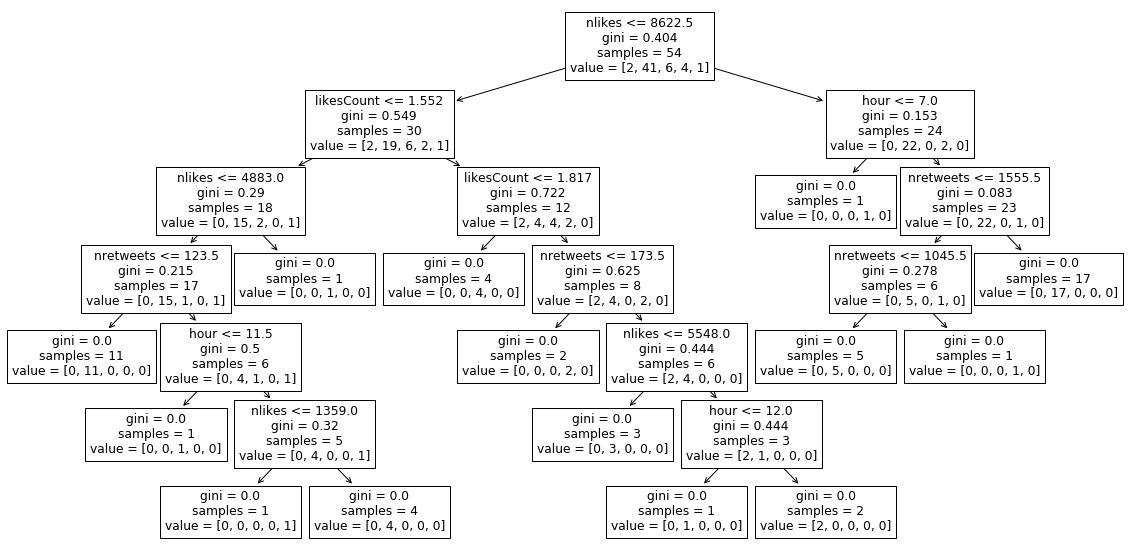

In [210]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
tree.plot_tree(clf,feature_names=X.columns) 